In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy.stats import norm
import warnings
warnings.filterwarnings('ignore')

In [2]:
test = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/bigdatamart_rep/master/bigdatamart_Test.csv')
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [3]:
train=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/bigdatamart_rep/master/bigdatamart_Train.csv')
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
print(test.shape)
print(train.shape)

(5681, 11)
(8523, 12)


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [7]:
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [8]:
test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

There are null values in both train and test datasets,in columns Item_Weight and Outlet_Size.

In [9]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [10]:
test.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4705.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.664849,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,8.645000,0.027047,94.412000,1987.000000
50%,12.500000,0.054154,141.415400,1999.000000
75%,16.700000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


In the training dataset, Item_Weight has missing values, let us fill the missing values with it's mean value

In [11]:
train['Item_Weight'].value_counts()

12.150    86
17.600    82
13.650    77
11.800    76
15.100    68
          ..
7.560      2
9.420      1
5.400      1
6.520      1
7.685      1
Name: Item_Weight, Length: 415, dtype: int64

In [12]:
mean1=train['Item_Weight'].mean()
mean1

12.857645184136183

In [13]:
train['Item_Weight'].fillna(mean1,inplace=True)

In [14]:
train.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

The feature Item_Weight now does not have any NaN values\
The feature Outlet_Size in the training data has missing values which we need to replace aswell.

In [15]:
train['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

We can see that the Outlet_Size depends on Outlet_Type

Let us now see how the Outlet_Type and Outlet_Size depend on each other

In [16]:
a=train.loc[train['Outlet_Type'] == 'Grocery Store']
a

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3,FDX07,19.200000,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
23,FDC37,12.857645,Low Fat,0.057557,Baking Goods,107.6938,OUT019,1985,Small,Tier 1,Grocery Store,214.3876
28,FDE51,5.925000,Regular,0.161467,Dairy,45.5086,OUT010,1998,NaN,Tier 3,Grocery Store,178.4344
29,FDC14,12.857645,Regular,0.072222,Canned,43.6454,OUT019,1985,Small,Tier 1,Grocery Store,125.8362
30,FDV38,19.250000,Low Fat,0.170349,Dairy,55.7956,OUT010,1998,NaN,Tier 3,Grocery Store,163.7868
...,...,...,...,...,...,...,...,...,...,...,...,...
8473,DRI47,14.700000,Low Fat,0.035016,Hard Drinks,144.3128,OUT010,1998,NaN,Tier 3,Grocery Store,431.4384
8480,FDQ58,12.857645,Low Fat,0.000000,Snack Foods,154.5340,OUT019,1985,Small,Tier 1,Grocery Store,459.4020
8486,FDR20,20.000000,Regular,0.000000,Fruits and Vegetables,46.4744,OUT010,1998,NaN,Tier 3,Grocery Store,45.2744
8490,FDU44,12.857645,Regular,0.102296,Fruits and Vegetables,162.3552,OUT019,1985,Small,Tier 1,Grocery Store,487.3656


Here we can observe that all the Output_Type == Grocery Store has Outlet_Size==Small

In [17]:
a['Outlet_Size'].value_counts()

Small    528
Name: Outlet_Size, dtype: int64

In [18]:
b=train.loc[train['Outlet_Type'] == 'Supermarket Type1']
b

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
...,...,...,...,...,...,...,...,...,...,...,...,...
8517,FDF53,20.750,reg,0.083607,Frozen Foods,178.8318,OUT046,1997,Small,Tier 1,Supermarket Type1,3608.6360
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136


In [19]:
b['Outlet_Size'].value_counts()

Small     1860
High       932
Medium     930
Name: Outlet_Size, dtype: int64

In [20]:
c=train.loc[train['Outlet_Type'] == 'Supermarket Type2']
c

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
16,NCB42,11.800,Low Fat,0.008596,Health and Hygiene,115.3492,OUT018,2009,Medium,Tier 3,Supermarket Type2,1621.8888
31,NCS17,18.600,Low Fat,0.080829,Health and Hygiene,96.4436,OUT018,2009,Medium,Tier 3,Supermarket Type2,2741.7644
32,FDP33,18.700,Low Fat,0.000000,Snack Foods,256.6672,OUT018,2009,Medium,Tier 3,Supermarket Type2,3068.0064
...,...,...,...,...,...,...,...,...,...,...,...,...
8506,DRF37,17.250,Low Fat,0.084676,Soft Drinks,263.1910,OUT018,2009,Medium,Tier 3,Supermarket Type2,3944.8650
8511,FDF05,17.500,Low Fat,0.026980,Frozen Foods,262.5910,OUT018,2009,Medium,Tier 3,Supermarket Type2,4207.8560
8515,FDH24,20.700,Low Fat,0.021518,Baking Goods,157.5288,OUT018,2009,Medium,Tier 3,Supermarket Type2,1571.2880
8516,NCJ19,18.600,Low Fat,0.118661,Others,58.7588,OUT018,2009,Medium,Tier 3,Supermarket Type2,858.8820


In [21]:
c['Outlet_Size'].value_counts()

Medium    928
Name: Outlet_Size, dtype: int64

From the above, we can observe that, if Outlet_Type is General Sroe/Supermarket Type1\
then the maximum of them are of Outlet_Size= 'Small'\
So let us fill the NaN values in Outlet_Size with "Small"

In [22]:
train['Outlet_Size'].fillna('Small',inplace=True)

In [23]:
train.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

We have removed all the NaN values from the TRAINING Data, let us now do the same in the TESTING Data

In [24]:
test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [25]:
mean2 = test['Item_Weight'].mean()

In [26]:
test['Item_Weight'].fillna(mean2,inplace=True)

In [27]:
test['Outlet_Size'].fillna('Small',inplace=True)

In [28]:
test.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [29]:
train['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

We observe that in the feature 'Item_Fat_Content', the naming has been done incorrectly, let us now rename them appropriately

In [30]:
train['Item_Fat_Content']=train['Item_Fat_Content'].replace({'LF':'Low Fat','low fat':'Low Fat','reg':'Regular'})

In [31]:
train['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

We have now updated the Training data appropriately, let us do the same in the Testing data

In [32]:
test['Item_Fat_Content'].value_counts()

Low Fat    3396
Regular    1935
LF          206
reg          78
low fat      66
Name: Item_Fat_Content, dtype: int64

In [33]:
test['Item_Fat_Content']=test['Item_Fat_Content'].replace({'LF':'Low Fat','low fat':'Low Fat','reg':'Regular'})

In [34]:
test['Item_Fat_Content'].value_counts()

Low Fat    3668
Regular    2013
Name: Item_Fat_Content, dtype: int64

We have successfully updated the same in the Testing data as well.

In [35]:
train['Item_Identifier'].value_counts()

FDW13    10
FDG33    10
FDG09     9
FDV60     9
FDX04     9
         ..
FDO33     1
FDQ60     1
DRF48     1
FDN52     1
FDE52     1
Name: Item_Identifier, Length: 1559, dtype: int64

Using Google I found out that FD - Food, NC - Non Consumables, DR - Drinks

Let us now reduce the Item Identifiers to FD, NC and DR

In [36]:
train['Item_Identifier'] = train['Item_Identifier'].apply(lambda x : x[:2])

In [37]:
train['Item_Identifier'].value_counts()

FD    6125
NC    1599
DR     799
Name: Item_Identifier, dtype: int64

In [38]:
train['Item_Visibility'].value_counts()

0.000000    526
0.076975      3
0.041283      2
0.085622      2
0.187841      2
           ... 
0.092576      1
0.067544      1
0.115168      1
0.146896      1
0.050902      1
Name: Item_Visibility, Length: 7880, dtype: int64

We noticed that the value of few rows in Item Visibility is 0, this does not make any sense, so le us replace it with the mean of Item Visibility

In [39]:
mean3 = train['Item_Visibility'].mean()
mean3

0.06613202877895127

In [40]:
train['Item_Visibility'] = train['Item_Visibility'].replace(0,np.NaN)

In [41]:
train['Item_Visibility'] = train['Item_Visibility'].replace(np.NaN,mean3)

In [42]:
train['Item_Visibility'].value_counts()

0.066132    526
0.076975      3
0.096592      2
0.104784      2
0.058919      2
           ... 
0.067544      1
0.115168      1
0.146896      1
0.081119      1
0.037218      1
Name: Item_Visibility, Length: 7880, dtype: int64

In [43]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FD,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DR,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FD,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FD,19.20,Regular,0.066132,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NC,8.93,Low Fat,0.066132,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


<AxesSubplot:xlabel='count', ylabel='Item_Type'>

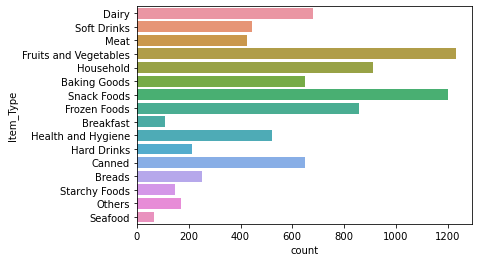

In [44]:
sns.countplot(y='Item_Type',data=train)

From the above graph we observe that Fruits and Vegetable are the most sold followed by Snack Foods.\
And the least sold are Seafood followed by Breakfast.

<AxesSubplot:xlabel='Outlet_Size', ylabel='count'>

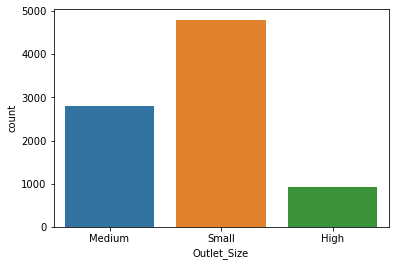

In [45]:
sns.countplot(x='Outlet_Size',data=train)

We can observe from the above grapth that most of the Outlet Sizes are Small.

<AxesSubplot:xlabel='Outlet_Type', ylabel='count'>

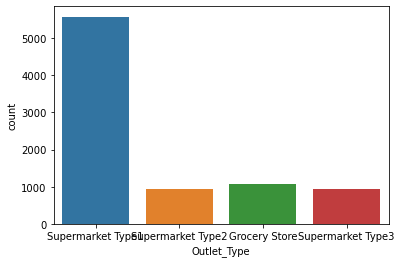

In [46]:
sns.countplot(x='Outlet_Type',data=train)

From the above graph, most of the supermarkets are of Type Supermarket Type1

<AxesSubplot:xlabel='Outlet_Identifier', ylabel='count'>

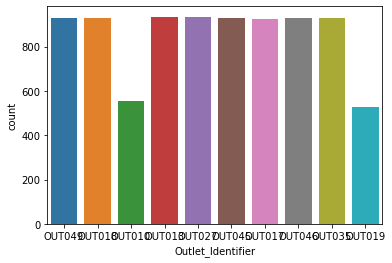

In [47]:
sns.countplot(x='Outlet_Identifier',data=train)

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='count'>

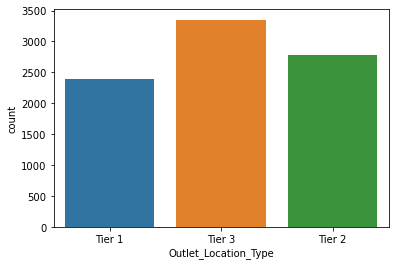

In [48]:
sns.countplot(x='Outlet_Location_Type',data=train)

Tier 3 has the most presence followed by Tier 2

In [49]:
train['Outlet_Location_Type'].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

Let us now check how Item_Outlet_Sales depends on the features Outlet_Location_Type, Outlet_Type, and Outlet_Size in 

In [50]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

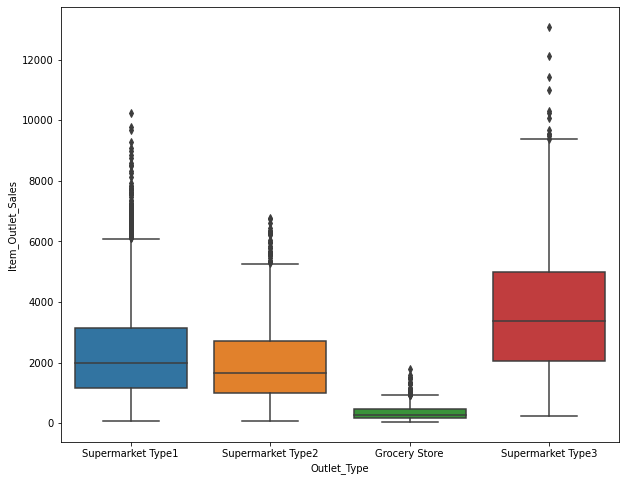

In [51]:
plt.figure(figsize=(10,8))
sns.boxplot(x='Outlet_Type',y='Item_Outlet_Sales',data=train)
plt.show()

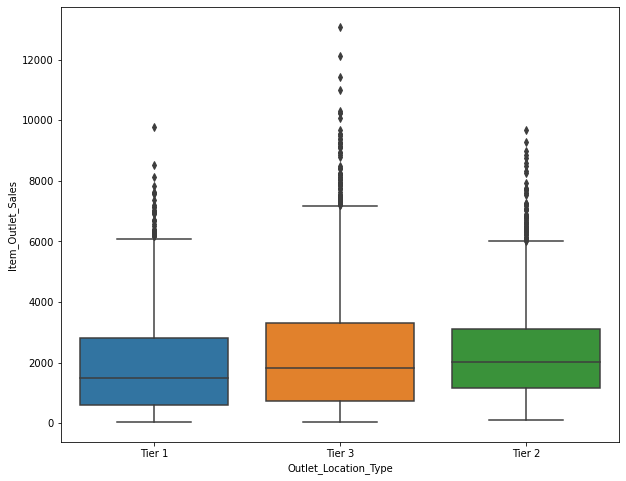

In [52]:
plt.figure(figsize=(10,8))
sns.boxplot(x='Outlet_Location_Type',y='Item_Outlet_Sales',data=train)
plt.show()

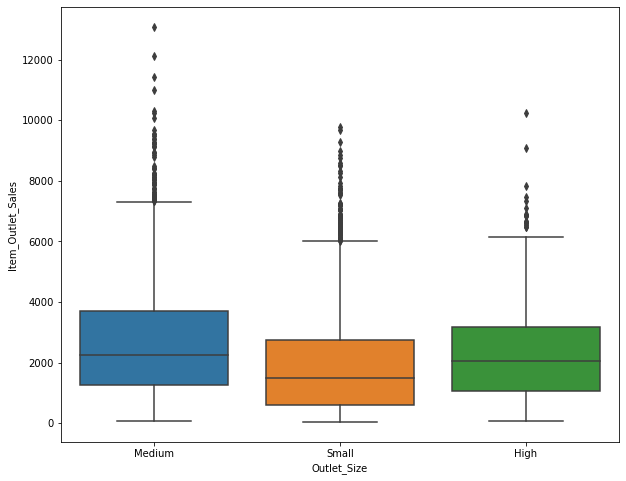

In [53]:
plt.figure(figsize=(10,8))
sns.boxplot(x='Outlet_Size',y='Item_Outlet_Sales',data=train)
plt.show()

Let us now see Outlet_Identifier and Item_Type v/s Item_Outlet_Sales

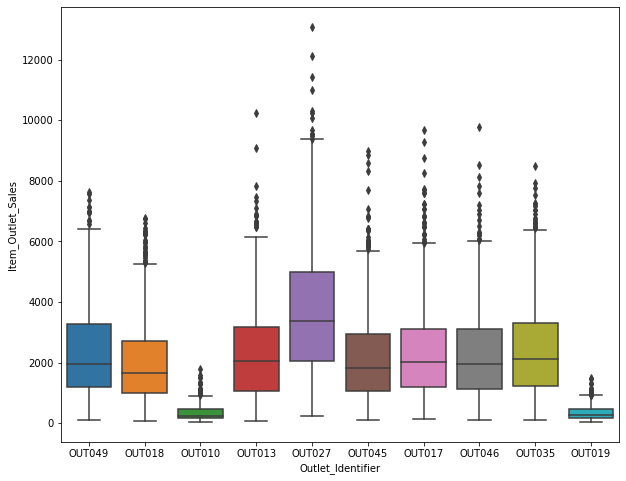

In [54]:
plt.figure(figsize=(10,8))
sns.boxplot(x='Outlet_Identifier',y='Item_Outlet_Sales',data=train)
plt.show()

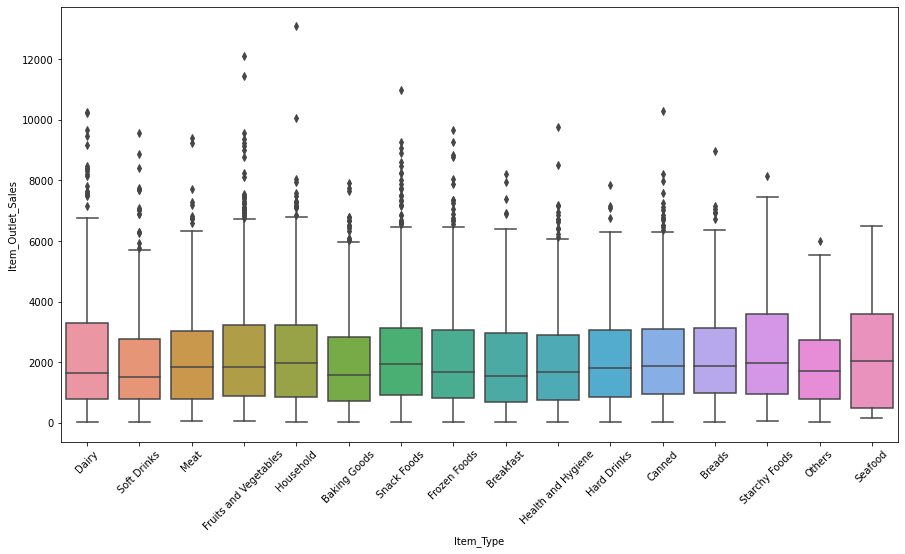

In [55]:
plt.figure(figsize=(15,8))
a=sns.boxplot(x='Item_Type',y='Item_Outlet_Sales',data=train)
plt.setp(a.get_xticklabels(), rotation=45)
plt.show()

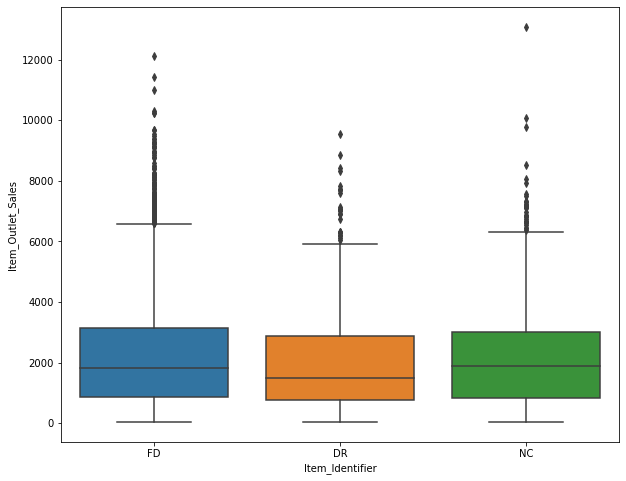

In [56]:
plt.figure(figsize=(10,8))
sns.boxplot(x='Item_Identifier', y='Item_Outlet_Sales', data=train)
plt.show()

In [57]:
df = train.copy()

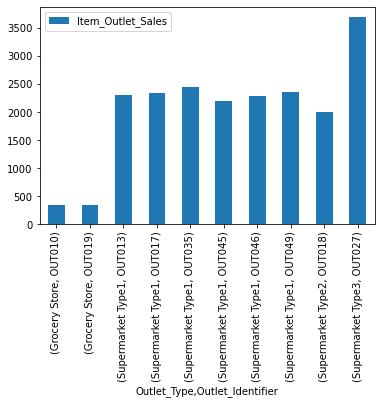

In [58]:
df.groupby(['Outlet_Type','Outlet_Identifier']).agg({'Item_Outlet_Sales':np.mean}).plot.bar()
plt.show()

Supermarket Type3(OUT027) contributes largely towards the Sales. Rest other are close to each other but very less sale is generated from Grocery store(OUT 10 and 19)

In [59]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

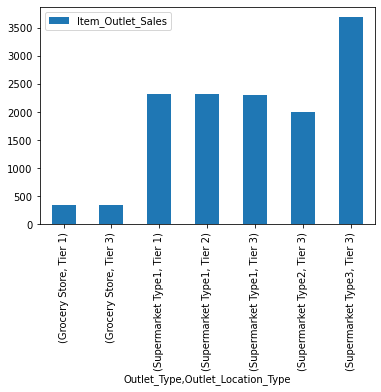

In [60]:
df.groupby(['Outlet_Type','Outlet_Location_Type']).agg({'Item_Outlet_Sales':np.mean}).plot.bar()
plt.show()

Findings from the above graph\
1.Medium size Supermarket type 3 outlet in Tier 3 loaction generate more revenue.\
2.Small size Grocery store in Tier 3 loaction generates less revenue

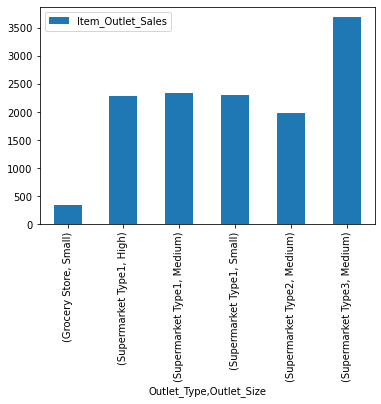

In [61]:
df.groupby(['Outlet_Type','Outlet_Size']).agg({'Item_Outlet_Sales':np.mean}).plot.bar()
plt.show()

From the above graph we can observe that Supermarket Type3 which is of Size Medium has generated the highest sales

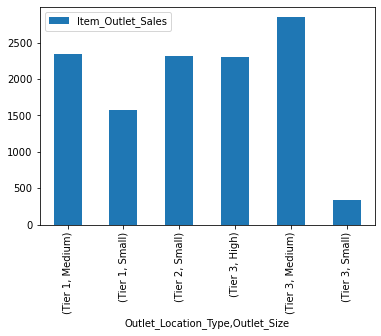

In [62]:
df.groupby(['Outlet_Location_Type','Outlet_Size']).agg({'Item_Outlet_Sales':np.mean}).plot.bar()
plt.show()

If the store is in a Tier3 Location and Medium in size, the generated sales is the maximum followed the Tier1, Medium

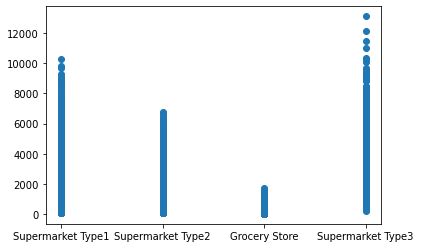

In [63]:
plt.scatter('Outlet_Type','Item_Outlet_Sales',data=df)

As confirmed earlier, Supermarket Type 3 is generating more sales whereas grocery store are contributing very less towards the sales figures

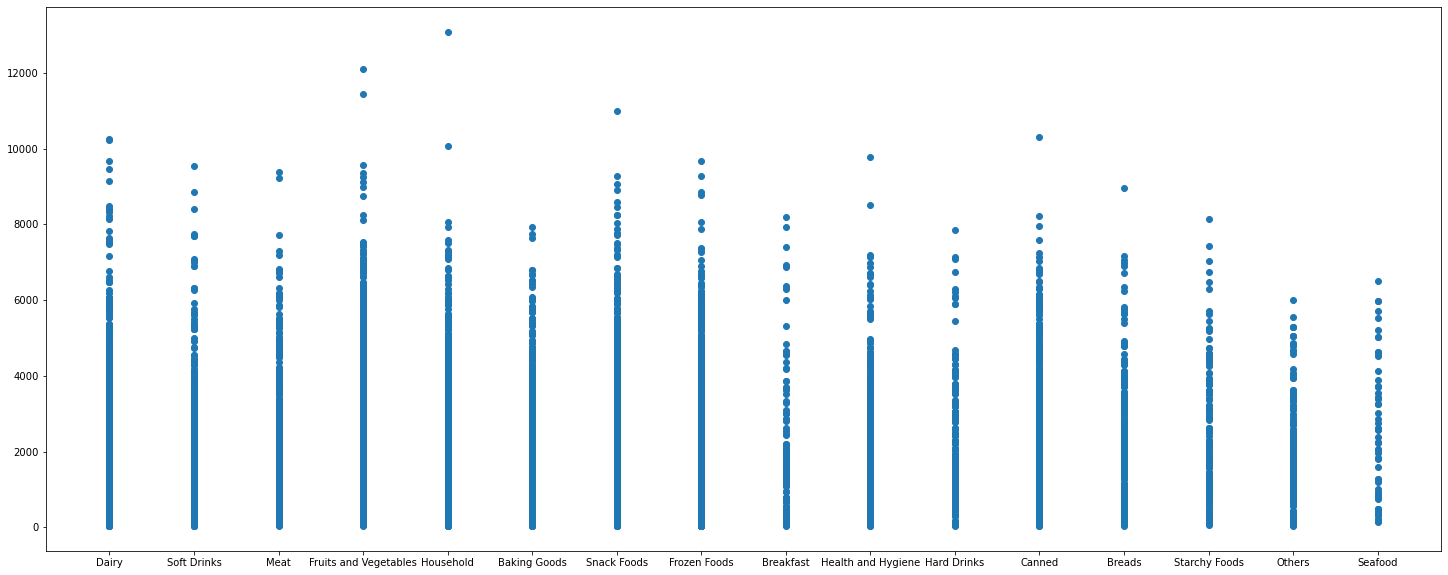

In [64]:
plt.figure(figsize=(25,10))
x=plt.scatter('Item_Type','Item_Outlet_Sales',data=df)

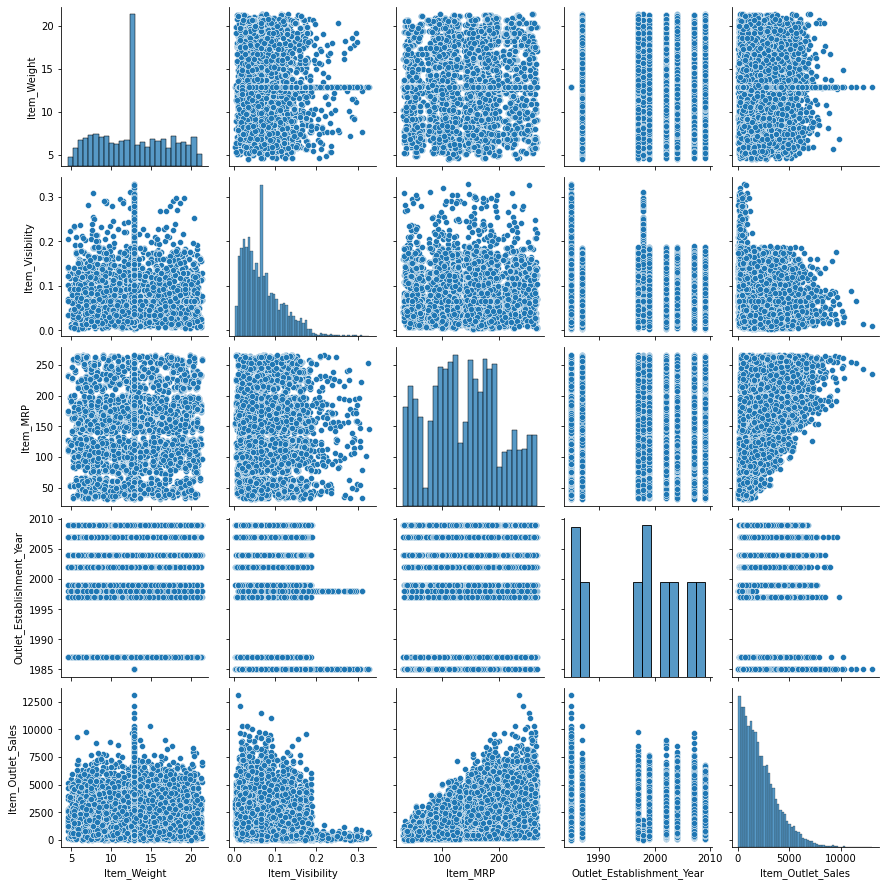

In [65]:
sns.pairplot(data=df)

<AxesSubplot:>

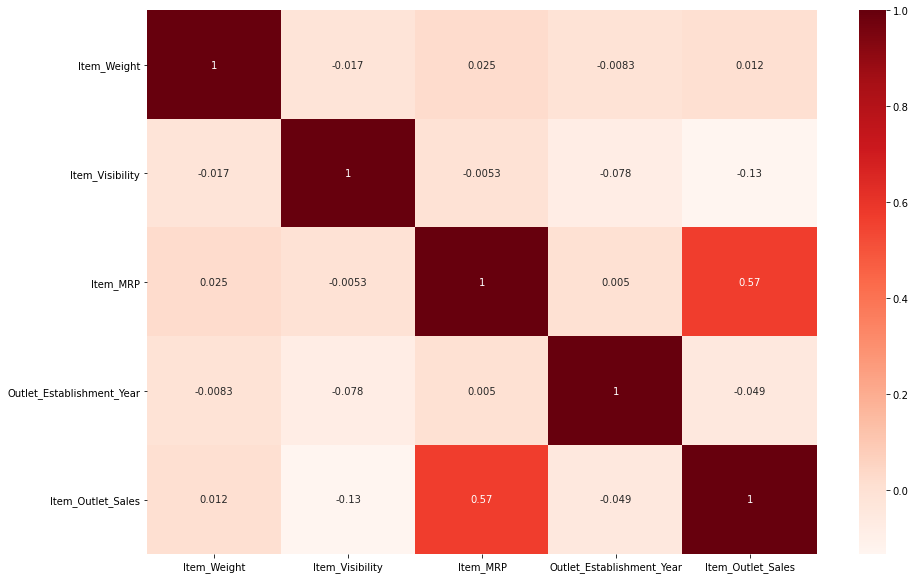

In [66]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True,cmap='Reds')

As we can see\
1.Outlet Sales is correalted to Item MRP\
2.Item weight has least impact on the Sales.

In [67]:
import statsmodels.api as sm

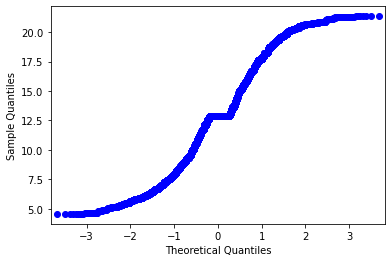

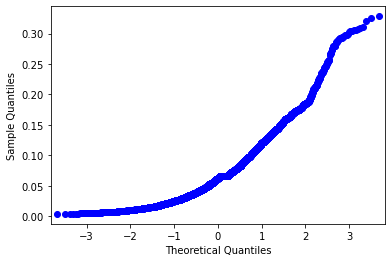

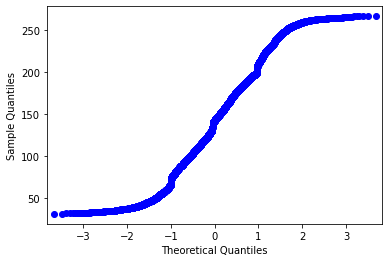

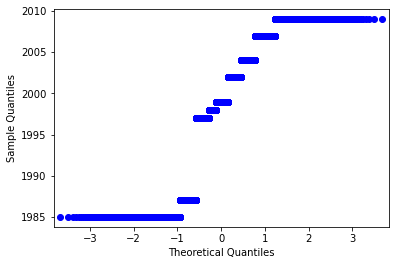

In [68]:
columns=['Item_Weight','Item_Visibility','Item_MRP','Outlet_Establishment_Year']
for i in columns:
    sm.qqplot(df[i])
    plt.show()

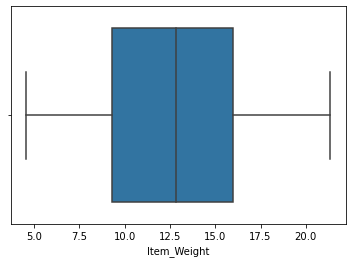

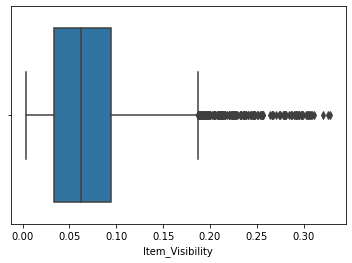

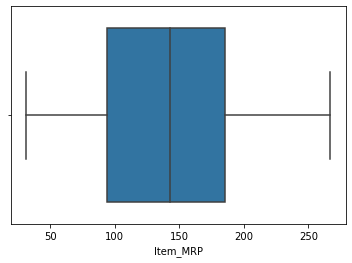

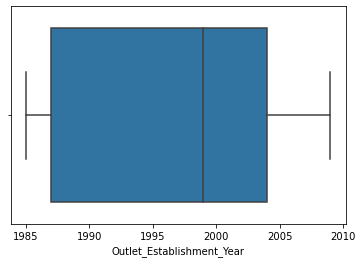

In [69]:
for i in columns:
    sns.boxplot(df[i])
    plt.show()

In [70]:
df.skew()

Item_Weight                  0.090561
Item_Visibility              1.286877
Item_MRP                     0.127202
Outlet_Establishment_Year   -0.396641
Item_Outlet_Sales            1.177531
dtype: float64

We can observe from the above boxplots that there is some outliers in Item_Visibility

In [71]:
df['Item_Visibility']=np.sqrt(df['Item_Visibility'])

In [72]:
df.skew()

Item_Weight                  0.090561
Item_Visibility              0.405969
Item_MRP                     0.127202
Outlet_Establishment_Year   -0.396641
Item_Outlet_Sales            1.177531
dtype: float64

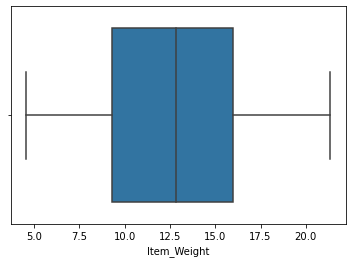

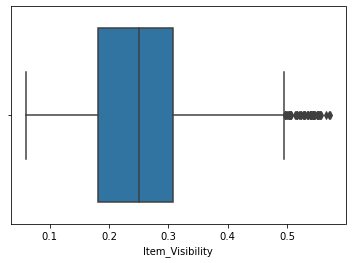

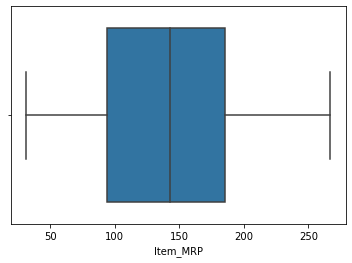

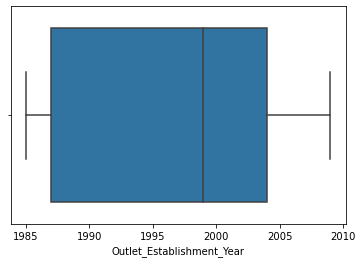

In [73]:
for i in columns:
    sns.boxplot(df[i])
    plt.show()

We have now reducted the sqewness as much as possible

In [74]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FD,9.30,Low Fat,0.126678,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DR,5.92,Regular,0.138846,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FD,17.50,Low Fat,0.129461,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FD,19.20,Regular,0.257161,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NC,8.93,Low Fat,0.257161,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


Let us now convert the Categorical data to Numerical Data using LabelEncoder

In [75]:
columns=['Item_Identifier','Item_Fat_Content','Item_Type','Outlet_Identifier','Outlet_Size',
         'Outlet_Location_Type','Outlet_Type']

In [76]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in columns:
    df[i]=le.fit_transform(df[i])
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,1,9.30,0,0.126678,4,249.8092,9,1999,1,0,1,3735.1380
1,0,5.92,1,0.138846,14,48.2692,3,2009,1,2,2,443.4228
2,1,17.50,0,0.129461,10,141.6180,9,1999,1,0,1,2097.2700
3,1,19.20,1,0.257161,6,182.0950,0,1998,2,2,0,732.3800
4,2,8.93,0,0.257161,9,53.8614,1,1987,0,2,1,994.7052


We have successfully converted the Categorical Data into Numerical Data\
Let us split the input and the output variables

In [77]:
df_x=df.drop(columns='Item_Outlet_Sales')
y=df['Item_Outlet_Sales']

In [78]:
df_x.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,1,9.30,0,0.126678,4,249.8092,9,1999,1,0,1
1,0,5.92,1,0.138846,14,48.2692,3,2009,1,2,2
2,1,17.50,0,0.129461,10,141.6180,9,1999,1,0,1
3,1,19.20,1,0.257161,6,182.0950,0,1998,2,2,0
4,2,8.93,0,0.257161,9,53.8614,1,1987,0,2,1


In [79]:
y.head()

0    3735.1380
1     443.4228
2    2097.2700
3     732.3800
4     994.7052
Name: Item_Outlet_Sales, dtype: float64

Let us now standardize our data using StandardScalar

In [87]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
sc_x = ss.fit_transform(df_x)
sc_x

array([[-0.17979501, -0.84187169, -0.73814723, ..., -0.66408049,
        -1.36933384, -0.25265831],
       [-2.09528612, -1.64170589,  1.35474328, ..., -0.66408049,
         1.09156913,  1.00297245],
       [-0.17979501,  1.09855449, -0.73814723, ..., -0.66408049,
        -1.36933384, -0.25265831],
       ...,
       [ 1.73569609, -0.53424315, -0.73814723, ...,  0.79995418,
        -0.13888236, -0.25265831],
       [-0.17979501, -1.33644372,  1.35474328, ..., -0.66408049,
         1.09156913,  1.00297245],
       [-2.09528612,  0.45963367, -0.73814723, ...,  0.79995418,
        -1.36933384, -0.25265831]])

Let us now start building our model

In [81]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

Let us now use Random state to find the best accuracy score

In [82]:
for i in range(0,50):
    x_train,x_test,y_train,y_test=train_test_split(df_x,y,test_size=0.20,random_state=i)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    print(f'At random state {i},the training accuracy is: {r2_score(y_train,pred_train)}')
    print(f'At random state {i},the testing accuracy is: {r2_score(y_test,pred_test)}')
    print('\n')

At random state 0,the training accuracy is: 0.5019609791169479
At random state 0,the testing accuracy is: 0.508168943831945


At random state 1,the training accuracy is: 0.503460171790596
At random state 1,the testing accuracy is: 0.5017226903559869


At random state 2,the training accuracy is: 0.5068756425692889
At random state 2,the testing accuracy is: 0.4882817568532881


At random state 3,the training accuracy is: 0.49452364180493524
At random state 3,the testing accuracy is: 0.5368410184591533


At random state 4,the training accuracy is: 0.5053550834079936
At random state 4,the testing accuracy is: 0.49270430456100256


At random state 5,the training accuracy is: 0.505267585017958
At random state 5,the testing accuracy is: 0.494613626202311


At random state 6,the training accuracy is: 0.5029250490154237
At random state 6,the testing accuracy is: 0.5034300836080431


At random state 7,the training accuracy is: 0.5067386682437747
At random state 7,the testing accuracy is: 0.49007

I think the best accuracy score is when we choose random state as 6

We will now split the data with the random_state 6 as that has given us the best accuracy on training and test data.

In [83]:
x_train,x_test,y_train,y_test=train_test_split(df_x,y,test_size=.20,random_state=6)

In [84]:
from sklearn.svm import SVR
kernellist=['linear','poly','rbf']
for i in kernellist:
    sv=SVR(kernel=i)
    sv.fit(x_train,y_train)
    print(sv.score(x_train,y_train))

0.47764641235142036
-0.04408030425338483
-0.04802666763576591


The linear kernel has given us the best accuracy, so let us choose the linear kernel

In [85]:
sv=SVR(kernel='linear')
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor

dt=DecisionTreeRegressor()
rf=RandomForestRegressor()
ab=AdaBoostRegressor()

model=[lr,sv,dt,rf,ab]

for m in model:
    m.fit(x_train,y_train)
    pred_train=m.predict(x_train)
    pred_test=m.predict(x_test)
    train_score=r2_score(y_train,pred_train)
    test_score=r2_score(y_test,pred_test)
    print('Accuracy of', m )
    print('Training Score', train_score)
    print('Testing Score', test_score)
    print('\n')

Accuracy of LinearRegression()
Training Score 0.5029250490154237
Testing Score 0.5034300836080431


Accuracy of SVR(kernel='linear')
Training Score 0.47764641235142036
Testing Score 0.48068439097499416


Accuracy of DecisionTreeRegressor()
Training Score 1.0
Testing Score 0.1437626142318077


Accuracy of RandomForestRegressor()
Training Score 0.939294417034477
Testing Score 0.5396964544338981


Accuracy of AdaBoostRegressor()
Training Score 0.3933370929403074
Testing Score 0.3733397387494134




We can see that RandomForestRegressor has the best accuracy score.

Let's cross validate our results

In [88]:
from sklearn.model_selection import cross_val_score

model=(lr,sv,dt,rf,ab)
for m in model:
    score=cross_val_score(m,sc_x,y,cv=5)
    print('Mean Accuracy of', m)
    print(score.mean())
    print('\n')

Mean Accuracy of LinearRegression()
0.501157522399013


Mean Accuracy of SVR(kernel='linear')
0.46240755002873063


Mean Accuracy of DecisionTreeRegressor()
0.14808272625365065


Mean Accuracy of RandomForestRegressor()
0.5454652239408357


Mean Accuracy of AdaBoostRegressor()
0.48747889804065786




We can confirm that RandomForestRegressor has the best accuracy Score

In [96]:
rf = RandomForestRegressor(n_estimators=100,max_depth=6, min_samples_leaf=50,n_jobs=4)
rf.fit(x_train, y_train)

RandomForestRegressor(max_depth=6, min_samples_leaf=50, n_jobs=4)

In [98]:
y_predrf = rf.predict(x_test)
y_predrf

array([1222.18446617, 2502.33877446, 2544.5948872 , ..., 1457.387533  ,
       1641.62429838,  278.81214276])

In [100]:
rf_accuracy = round(rf.score(x_train,y_train),2)
rf_accuracy

0.62

In [101]:
r2_score(y_train, rf.predict(x_train))


0.617368781450717

In [102]:
cv_score = cross_val_score(rf, x_train, y_train, cv=5)
print(np.sqrt(np.abs(cv_score)))

[0.77252602 0.7627385  0.7852334  0.7873917  0.77403612]


Let us now save our model

In [105]:
import pickle
filename = 'BigDataMart.pkl'
pickle.dump(model,open(filename,'wb'))